**классификатор изображений (RAW)**

Евгений Борисов <esborisov@sevsu.ru>

In [1]:
import numpy as np
import numpy.random as rng
from matplotlib import pyplot as plt

## подготовка данных

In [2]:
from sklearn.datasets import fetch_openml  # https://www.openml.org

X,target = fetch_openml( name='Fashion-MNIST', as_frame=False, return_X_y=True)
X = X.astype(np.float32).reshape(70000,28,28)
target = target.astype(np.uint8)

from sklearn.model_selection import train_test_split
image_train, image_test, target_train, target_test = train_test_split(X, target, test_size=.2)
display( image_train.shape, image_test.shape )

(56000, 28, 28)

(14000, 28, 28)

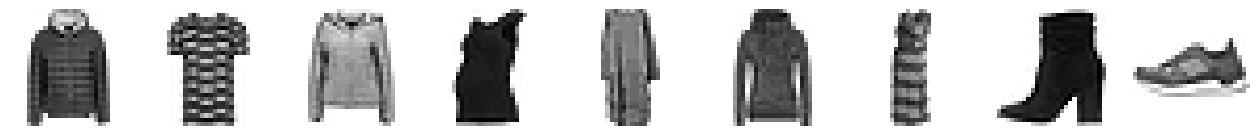

In [3]:
n_show = 9

plt.figure(figsize=(16,4))
for n,i in enumerate(rng.permutation(len(image_train))[:n_show], start=1):
    img = image_train[i]
    
    plt.subplot(1,n_show,n)
    plt.axis(False)
    plt.imshow(img,cmap='gray_r')


In [4]:
n_train,h,w = image_train.shape
n_test,_,_ = image_test.shape

X_train = image_train.reshape(n_train,w*h)
X_test = image_test.reshape(n_test,w*h)

X_train.shape, X_test.shape

((56000, 784), (14000, 784))

## обучение модели

In [5]:
%%time

from sklearn.model_selection import train_test_split

# уменьшаем размер учебного набора для SVM
X_train_, _, target_train_, _ = train_test_split( 
      X_train, target_train, test_size=.73)
display( X_train_.shape)

(15120, 784)

CPU times: user 23.5 ms, sys: 10 ms, total: 33.5 ms
Wall time: 32.8 ms


In [6]:
%%time

from sklearn import svm

model = svm.SVC().fit(X_train_,target_train_)

CPU times: user 15.5 s, sys: 24.8 ms, total: 15.5 s
Wall time: 15.5 s


## оценка результатов

In [7]:
%%time 

o_test = model.predict(X_test)

CPU times: user 46.9 s, sys: 7.4 ms, total: 46.9 s
Wall time: 46.9 s


In [8]:
class_names = [ 
    'футболка', 
    'брюки', 
    'свитер', 
    'платье', 
    'пальто', 
    'сандали', 
    'рубашка', 
    'тапки', 
    'сумка', 
    'полусапожки', 
    ]

In [9]:
from sklearn.metrics import classification_report

print( classification_report( 
    target_test, o_test, target_names=class_names) ) 

              precision    recall  f1-score   support

    футболка       0.80      0.83      0.81      1419
       брюки       0.99      0.96      0.98      1356
      свитер       0.77      0.80      0.78      1348
      платье       0.85      0.90      0.88      1404
      пальто       0.79      0.78      0.79      1423
     сандали       0.95      0.93      0.94      1436
     рубашка       0.67      0.61      0.64      1440
       тапки       0.91      0.94      0.92      1360
       сумка       0.95      0.96      0.96      1435
 полусапожки       0.95      0.95      0.95      1379

    accuracy                           0.87     14000
   macro avg       0.86      0.87      0.87     14000
weighted avg       0.86      0.87      0.86     14000



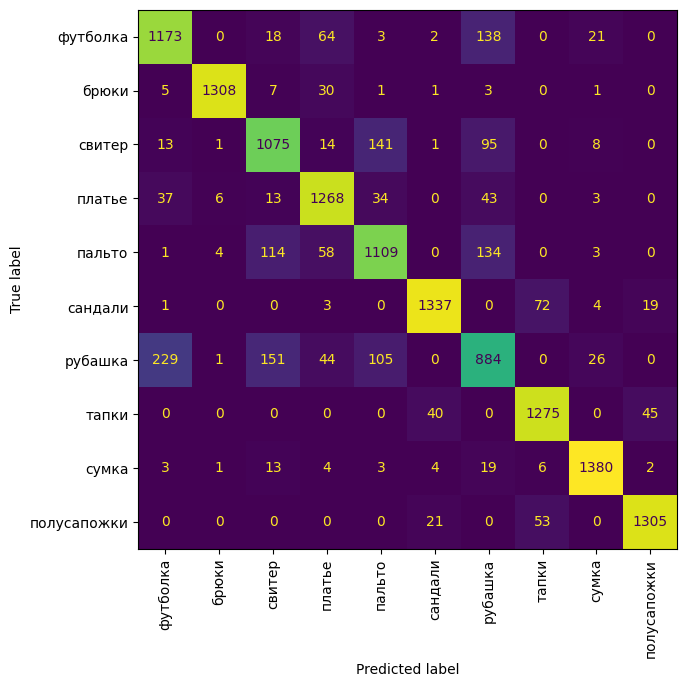

In [10]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

fig,ax = plt.subplots(figsize=(7,7))
disp = ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix(target_test,o_test), 
    display_labels=class_names,
)
disp.plot(ax=ax, xticks_rotation='vertical', include_values=True, cmap='viridis',  colorbar=False,)
plt.show()

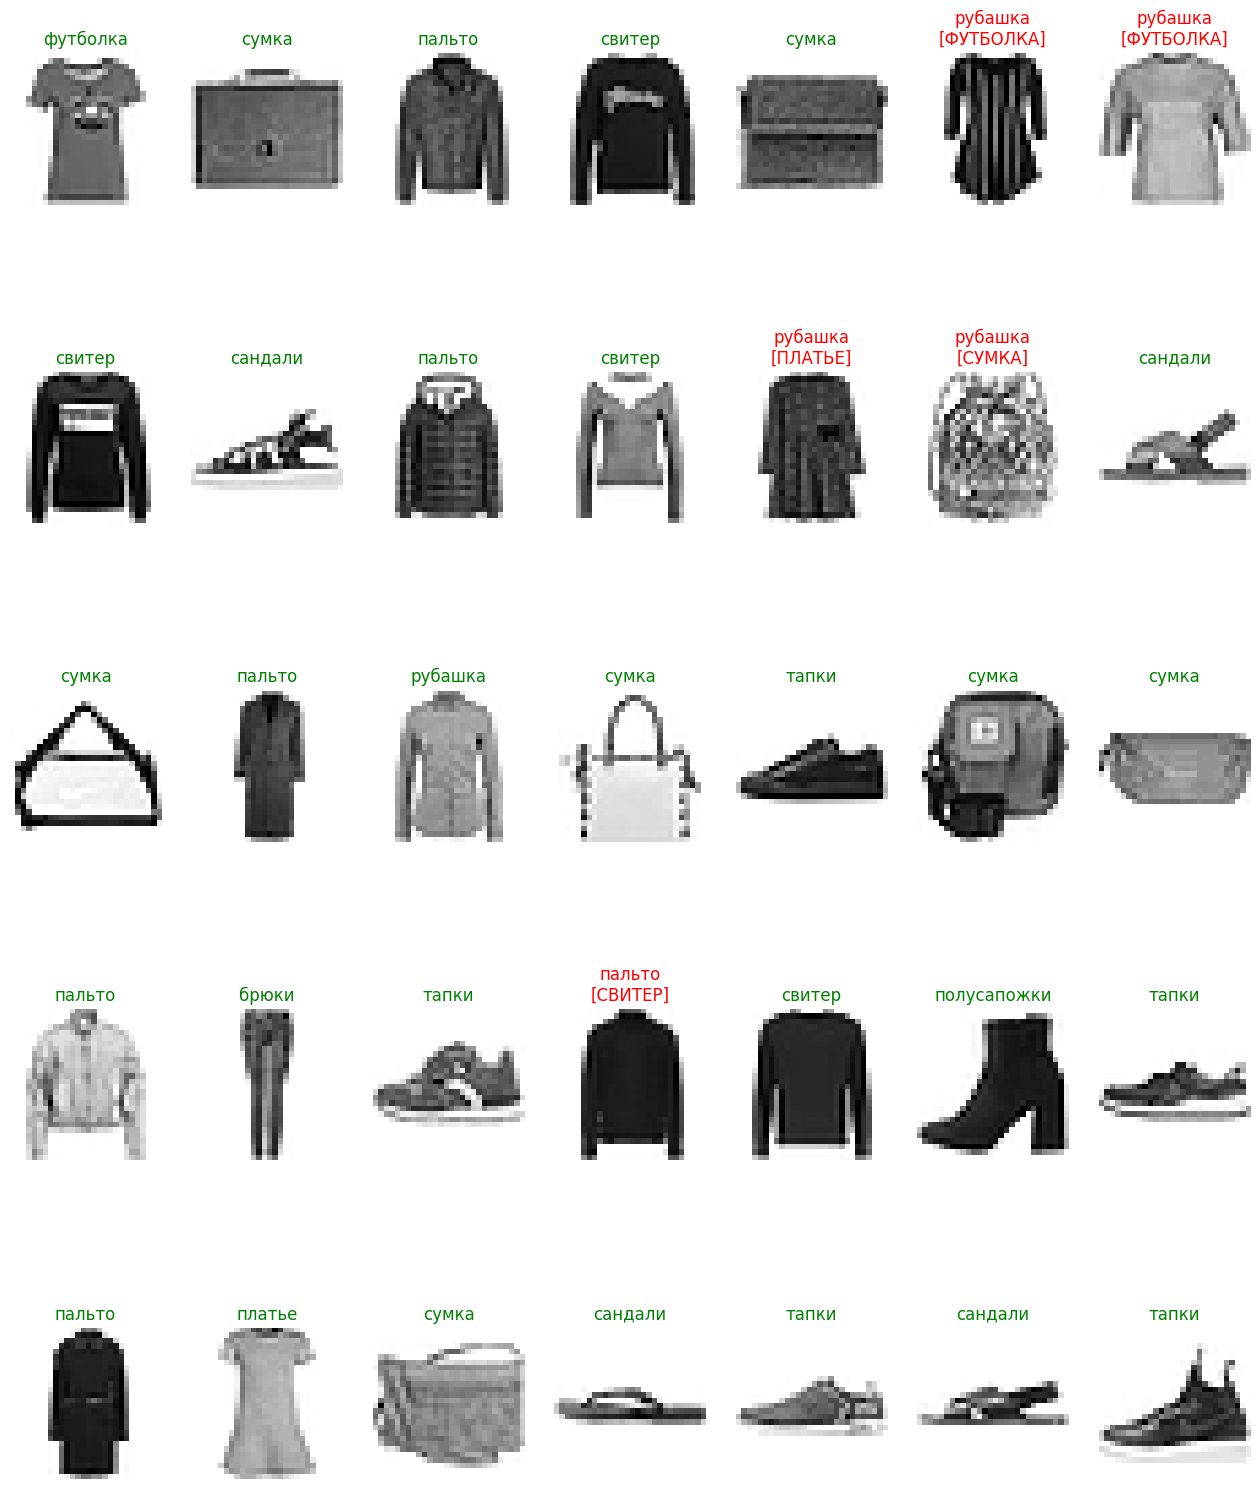

In [11]:
n_show, n_cols = 35, 7

n_rows = np.ceil(n_show/n_cols).astype(int)

plt.figure(figsize=(16,4*n_rows,))
for n,i in enumerate( rng.permutation(len(image_test))[:n_show] ):
    img = image_test[i]
    
    er = target_test[i]==o_test[i]
    t_mark = class_names[target_test[i]] 
    t_pred = class_names[o_test[i]] 
    t,c = (t_mark,'g') if er else (f'{t_pred}\n[{t_mark.upper()}]','r')
   
    plt.subplot(n_rows,n_cols,n+1)
    plt.axis(False)
    plt.title(t,color=c)
    plt.imshow(img,cmap='gray_r')


-----

In [ ]:
# ~/.keras/datasets/fashion-mnist
#  t10k-images-idx3-ubyte.gz  
#  t10k-labels-idx1-ubyte.gz  
#  train-images-idx3-ubyte.gz  
#  train-labels-idx1-ubyte.gz

# https://storage.googleapis.com/tensorflow/tf-keras-datasets/train-labels-idx1-ubyte.gz
# https://storage.googleapis.com/tensorflow/tf-keras-datasets/train-images-idx3-ubyte.gz
# https://storage.googleapis.com/tensorflow/tf-keras-datasets/t10k-labels-idx1-ubyte.gz   
# https://storage.googleapis.com/tensorflow/tf-keras-datasets/t10k-images-idx3-ubyte.gz    

In [ ]:
# !mkdir -p ../data/fashion-mnist
# !wget -P ../data/fashion-mnist -c http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-images-idx3-ubyte.gz
# !wget -P ../data/fashion-mnist -c http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-labels-idx1-ubyte.gz
# !wget -P ../data/fashion-mnist -c http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-images-idx3-ubyte.gz
# !wget -P ../data/fashion-mnist -c http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-labels-idx1-ubyte.gz

# # http://yann.lecun.com/exdb/mnist/
# import gzip
# import idx2numpy

# def ar2im(x): return ((x-x.min())/(x.max()-x.min())*255.).astype(np.uint8)

# DATASET_FOLDER = 'fashion-mnist'

# with gzip.open( DATASET_FOLDER+'/train-images-idx3-ubyte.gz','rb') as f:
#     image_train = idx2numpy.convert_from_string(f.read())
    
# with gzip.open( DATASET_FOLDER+'/train-labels-idx1-ubyte.gz','rb') as f:
#     target_train = idx2numpy.convert_from_string(f.read())

# with gzip.open( DATASET_FOLDER+'/t10k-images-idx3-ubyte.gz','rb') as f:
#     image_test = idx2numpy.convert_from_string(f.read())
    
# with gzip.open( DATASET_FOLDER+'/t10k-labels-idx1-ubyte.gz','rb') as f:
#     target_test = idx2numpy.convert_from_string(f.read())

# image_train.shape, image_test.shape

In [ ]:
# from torchvision.datasets import FashionMNIST

# data_train = FashionMNIST(root='./data', train=True,  download=True)
# data_test  = FashionMNIST(root='./data', train=False, download=True)

# image_train = data_train.data.numpy()
# targets_train = data_train.targets.numpy()

# image_test = data_test.data.numpy()
# targets_test = data_test.targets.numpy()

# class_names = data_train.classes

# del data_train
# del data_test

# (
# image_train.shape, targets_train.shape, 
# image_test.shape, targets_test.shape, 
# class_names,
# )

In [ ]:
# from tensorflow.keras.datasets import fashion_mnist

# (image_train, target_train),(image_test, target_test) = fashion_mnist.load_data()

# display( image_train.shape, image_test.shape )